# Grover's Algorithm : 2-Qubit Search
This notebook demonstrate the implementation for grover's search algorithm for **N=4 (2-Qubits)** to find the marked state.

we will:
1. Prepare an equal superposition
2. Apply the **oracle** (marking target state)
3. Apply the **Diffusion Operator**(Amplifier amplification)
4. Visualize amplitudes
5. Measure the result

## 1. Import Required Qiskit Libraries

In [11]:
from qiskit import QuantumCircuit,transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram,plot_state_city,plot_state_qsphere
import numpy as np
from qiskit.circuit import Instruction
from qiskit.quantum_info import Statevector

## Step 1 - Create Superposition (Apply Hadadamrd on both Qubit)
we start from |00> .applying hadamard on each qubit creates :
\begin{equation}
|\psi> = \frac{1}{2}(|00> + |01> +|10> +|11>)
\end{equation}

this ensures that all state are equally likely before making a target.

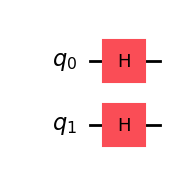

In [3]:
qc =QuantumCircuit(2)
qc.h([0,1])
qc.draw('mpl')

## Step 2 - Oracle
We mark the target state(stay **|11>** by adding a phase flip)

**Why?**

Grover's Algorithm amplifies the amplitude of  the marked state by first making it **negative** ,then reflecting all amplitudes about the mean.

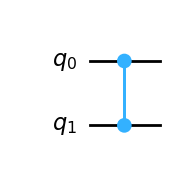

In [4]:
# A simple oracle for |11> is a **controlled-Z (CZ)** gate.
oracle =QuantumCircuit(2,name='Oracle')
oracle.cz(0,1)
oracle.draw('mpl')

## Step 3 -Diffusion Operator
Grover's Diffusion operator perform **reflection about the mean**
- **Why?**
After the oracle marked state become negative.so ,the diffusion operator increase its amplitude.


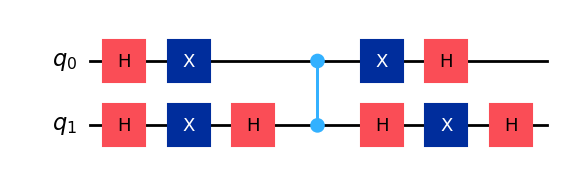

In [5]:
diffuser = QuantumCircuit(2,name='diffuser')

# Apply Hadamard gate on both qubit
diffuser.h([0,1])

# Apply X-gate on both qubit to perform bit flip
diffuser.x([0,1])

# Apply Hadamard gate on q1
diffuser.h(1)

# Apply cz gate on q0 qnd q1
diffuser.cz(0,1)

# reverse application of all gates
diffuser.h(1)
diffuser.x([0,1])
diffuser.h([0,1])

# Visualize the circuit
diffuser.draw('mpl')



## Step 4 - Bulid the Full Grover Circuit
Grover Iterartion count for N=4 is:

$$
R \approx \frac{\pi}{4} \sqrt{4} =1
$$

So we Apply **one iterartion**

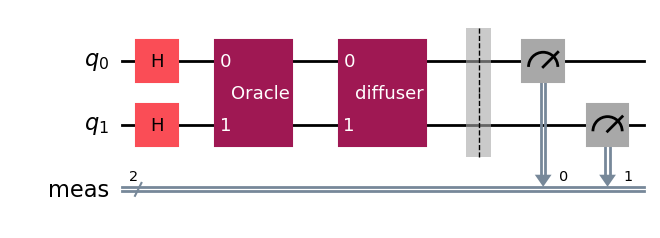

In [6]:
grover = QuantumCircuit(2)

# put both Qubit in superposition to check our oracle work properly on it
grover.h([0,1])

# Apply oracle
oracle_inst=Instruction(name='Oracle',num_qubits=2,num_clbits=0,params=[])
oracle_inst.definition=oracle
grover.append(oracle_inst,[0,1])

# Apply Diffusion
diffuser_inst=Instruction(name='diffuser',num_qubits=2,num_clbits=0,params=[])
diffuser_inst.definition=diffuser
grover.append(diffuser_inst,[0,1])

# measure all circuit
grover.measure_all()

#Visualize the total circuit
grover.draw('mpl')

## Step 5 - Simulate and View Result

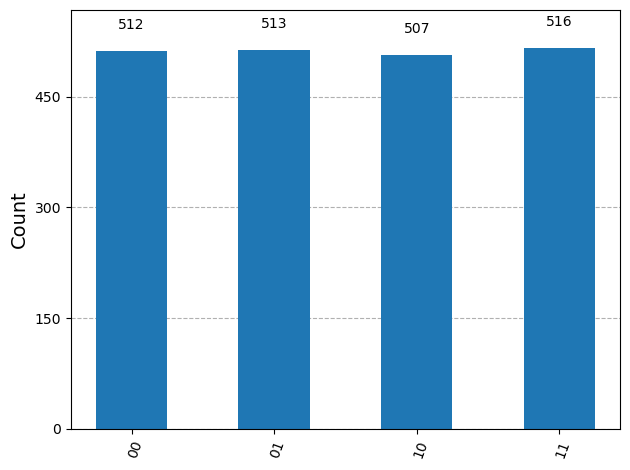

In [7]:
sim= AerSimulator()
grover_t=transpile(grover,sim)
result=sim.run(grover_t,shots=2048).result()
counts=result.get_counts()
plot_histogram(counts)

## Visualize Amplitudes (Statevector)

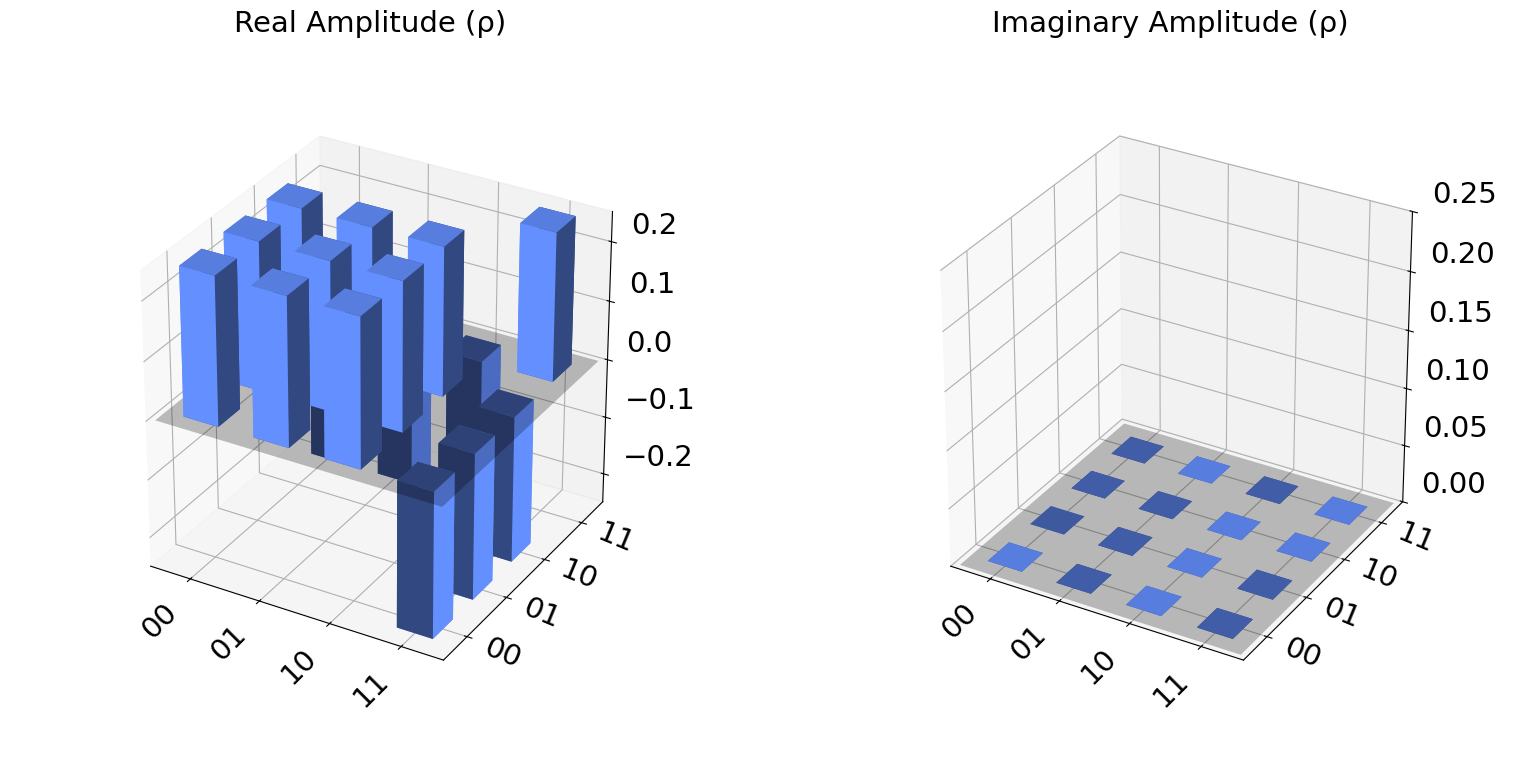

In [9]:
vec= Statevector.from_instruction(grover_t.remove_final_measurements(inplace=False))
plot_state_city(vec)

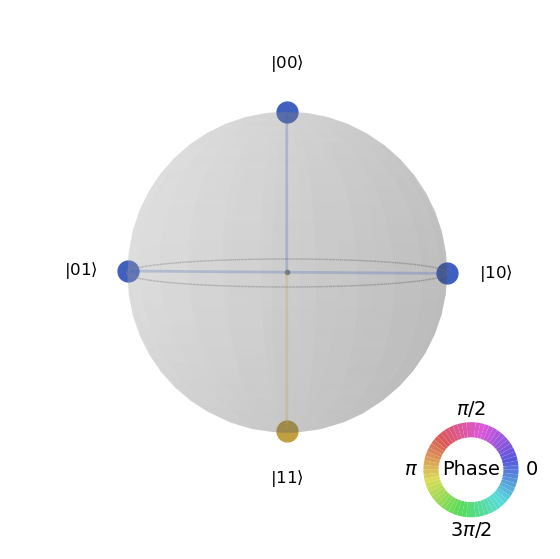

In [13]:
plot_state_qsphere(vec)

## Conclusion
- Oracle marks the target state by phase inversion
- Diffusion operators amplifies its amplitude
- For 2 qubits , 1 Grover iteration is sufficient
- Result should be **|11>** with high probability.

in this notebook we learned how grover algorithm working  and its implementation for 2 Qubit. Grover's algorithm will be used in the future to **Speed up searching, pattern -matching task accross cryptography,AI and large scale data analysis.**

---

**Author:** *Shreya Palase*  

**Date Created:**  *9-Dec-2025*

**project:** Quantum-Computing-coding

**File:** day16_GroverAlgorithm.ipynb

Thank you and Keep Learning!

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>